<a href="https://colab.research.google.com/github/ahadAli102/ML-Linear-Regression-using-addmision-prediction/blob/main/linear_regression_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#dataset url : https://www.kaggle.com/datasets/harasissingh/admission-predict
data = pd.read_csv("/content/drive/MyDrive/datasets/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data = data.drop(['Serial No.'],axis=1)

In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


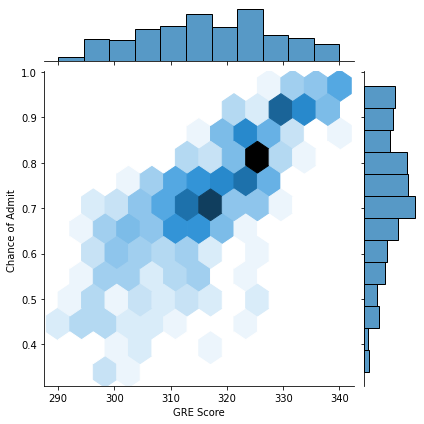

In [ ]:
 sns.jointplot(data["GRE Score"],data["Chance of Admit "],kind='hex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


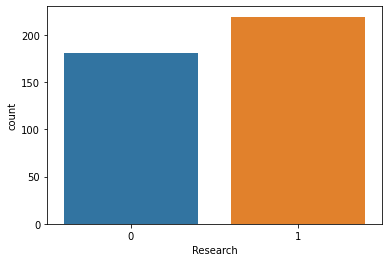

In [ ]:
sns.countplot(data["Research"])

In [ ]:
data1 = data.loc[data['Chance of Admit '] >= 0.7]
data2 = data.loc[data['Chance of Admit '] < 0.7]

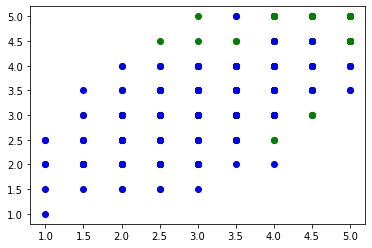

In [ ]:
plt.scatter(x=data1['SOP'],y=data1['LOR '],color="green")
plt.scatter(x=data2['SOP'],y=data2['LOR '],color="blue")

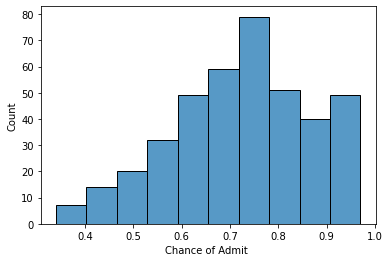

In [ ]:
sns.histplot(data=data['Chance of Admit '],bins=10)

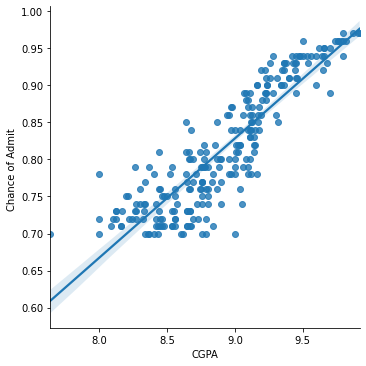

In [ ]:
sns.lmplot(x="CGPA",y="Chance of Admit ",data=data1)

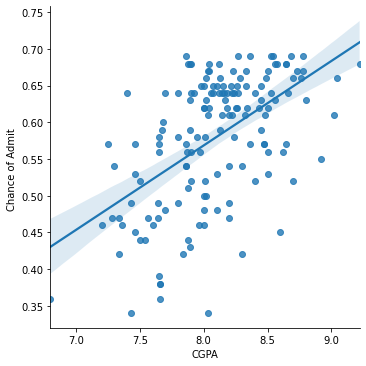

In [ ]:
sns.lmplot(x="CGPA",y="Chance of Admit ",data=data2)

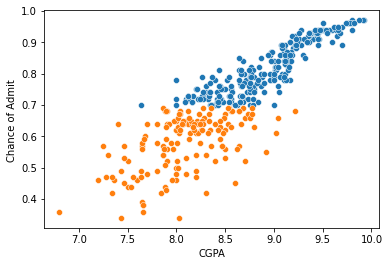

In [ ]:
sns.scatterplot(x="CGPA",y="Chance of Admit ",data=data1)
sns.scatterplot(x="CGPA",y="Chance of Admit ",data=data2)

In [ ]:
X = data.drop(['Chance of Admit '],axis=1)
y = data['Chance of Admit ']
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
est = sm.OLS(y.astype(float), X.astype(float)).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              6034.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        08:59:25   Log-Likelihood:                          491.14
No. Observations:                 400   AIC:                                     -968.3
Df Residuals:                     393   BIC:                                     -940.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = linreg.predict(x_test)

In [ ]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [ 0.00151123  0.00314554  0.00824371 -0.00564734  0.02172334  0.11532606
  0.02610078]
Intercept: -1.1772232142223102
MAE: 0.04495779899577682
MSE: 0.004442679729994745
RMSE: 0.06665342999422269
AccuracyII: 80.79043677020098 %
R2: 0.8079043677020099


In [ ]:
print("Train set Accuracy: ", r2_score(y_train, linreg.predict(x_train)))
print("Test set Accuracy: ", r2_score(y_test, predictions))

Train set Accuracy:  0.800877808114134
Test set Accuracy:  0.8079043677020099


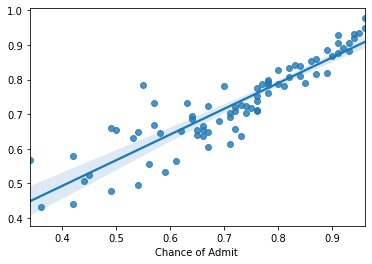

In [ ]:
sns.regplot(x=y_test, y=predictions,label="Actual")

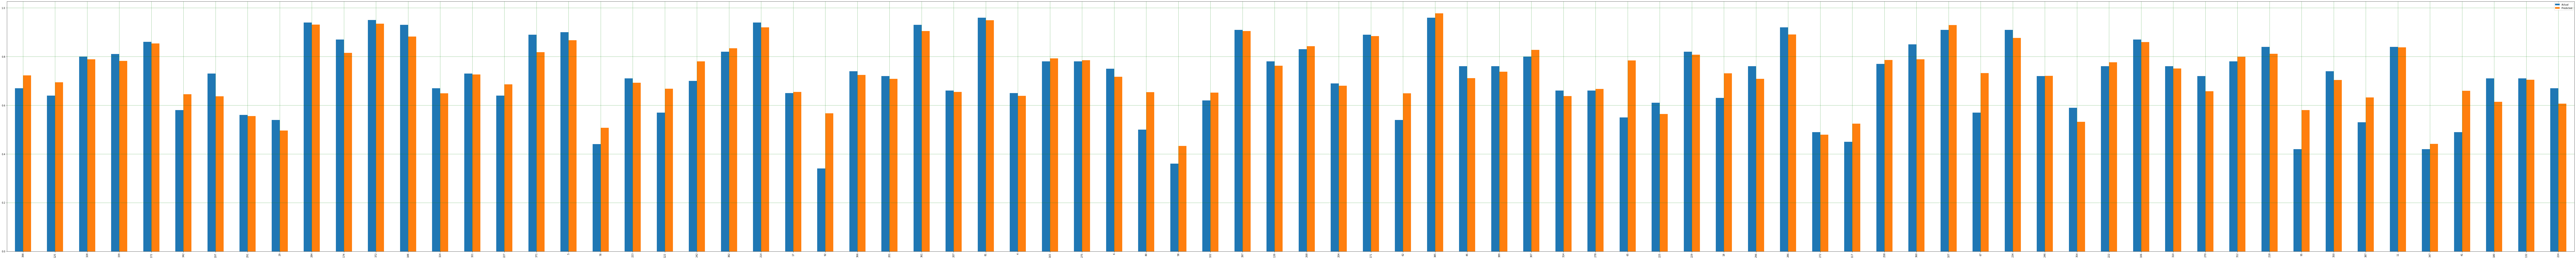

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
#actual vs predicted plot
df2.plot(kind='bar',figsize=(200,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
new_observation = [[300, 112, 3,	4.5,	4.5,	9.00,	0	]]
linreg.predict(new_observation)

array([0.76345556])